In [1]:
from manim import *
from pathlib import Path
import shutil
import time
import json
import os

params = " -v WARNING -r 80,40 -s  --disable_caching Example"
    
name_snippet_pairs = {}

Manim Community v0.10.0

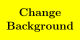

In [2]:
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        self.camera.background_color = YELLOW
        mob = Tex(r"\textbf{Change \\ Background}", color=BLACK)
        self.add(mob)
        self.camera.frame.scale(1/4)

###******        
image_full_name = "Background.png"
snippet = """
self.camera.background_color = YELLOW
"""
name_snippet_pairs[image_full_name] = snippet

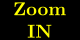

In [3]:
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Tex(r"\textbf{Zoom \\ IN}", color=YELLOW)
        self.camera.frame.scale(0.6)

        self.add(mob)
        self.camera.frame.scale(1/4)

###******        
image_full_name = "ZoomIN.png"
snippet = """
# Scene needs to be "class MyExample(ZoomedScene)"
self.camera.frame.scale(0.6)
"""
name_snippet_pairs[image_full_name] = snippet

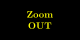

In [4]:
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Tex(r"\textbf{Zoom \\ OUT}", color=YELLOW)
        self.camera.frame.scale(1.2)

        self.add(mob)
        self.camera.frame.scale(1/4)

###******        
image_full_name = "ZoomOUT.png"
snippet = """
# Scene needs to be "class MyExample(ZoomedScene)"
self.camera.frame.scale(1.2)
"""
name_snippet_pairs[image_full_name] = snippet

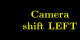

In [5]:
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Tex(r"\textbf{Camera \\ shift LEFT}", color=YELLOW)
        self.camera.frame.shift(LEFT*0.5)
        self.add(mob)
        self.camera.frame.scale(1/3.5)

###******        
image_full_name = "CameraLEFT.png"
snippet = """
# Scene needs to be "class MyExample(ZoomedScene)"
self.camera.frame.shift(LEFT*0.5)
"""
name_snippet_pairs[image_full_name] = snippet

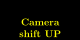

In [6]:
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Tex(r"\textbf{Camera \\ shift UP}", color=YELLOW)
        self.camera.frame.shift(UP*0.4)
        self.add(mob)
        self.camera.frame.scale(1/3.5)

###******        
image_full_name = "CameraUP.png"
snippet = """
# Scene needs to be "class MyExample(ZoomedScene)"
self.camera.frame.shift(UP*0.4)
"""
name_snippet_pairs[image_full_name] = snippet

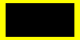

In [7]:
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = FullScreenRectangle(stroke_width=200, color= YELLOW)
        self.add(mob)

###******        
image_full_name = "FullScreenRectangle.png"
snippet = """
mob = FullScreenRectangle(stroke_width=200, color= YELLOW)
"""
name_snippet_pairs[image_full_name] = snippet

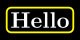

In [12]:
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        inner = Tex(r"\textbf{Hello}", color=WHITE)
        mob = SurroundingRectangle(inner, corner_radius=0.1)
        self.add(mob,inner)
        self.camera.frame.scale(1/8)


###******        
image_full_name = "SurroundingRectangle.png"
snippet = r"""
inner = Tex(r"\textbf{Hello}", color=WHITE)
mob = SurroundingRectangle(inner, corner_radius=0.1)
"""
name_snippet_pairs[image_full_name] = snippet

# Save here!

In [13]:
#pip install ipylab
from ipylab import JupyterFrontEnd

app = JupyterFrontEnd()
app.commands.execute('docmanager:save')

In [14]:
file_name = "Camera_and_Style"

In [15]:
folder_name = file_name + "_files"
notebook_name = file_name + ".ipynb"
markdown_name = file_name + ".md"
!rm -r $folder_name
!jupyter nbconvert $notebook_name --to markdown
!rm -r $markdown_name
base_directory = Path.cwd() / folder_name
target_directory = Path.cwd() / "imgs"
target_directory.mkdir(parents=True, exist_ok=True)

prefix = file_name # delete files that where created in the past 
for file in target_directory.rglob("*"):
    if (prefix in file.name):
        file.unlink() 

paths = sorted(Path(base_directory).iterdir(), key=os.path.getmtime)
dest_names = list(name_snippet_pairs.keys())
new_keys = []
for num, (p,des) in enumerate(zip(paths,dest_names)):
    to_path = target_directory /  f"{file_name}_{num:03}_{des}"   
    shutil.copy(p,  to_path)
    new_keys.append(to_path.name)
    
new_name_snippet_pairs ={} 
new_values = list(name_snippet_pairs.values())
for key, value in zip(new_keys,new_values):
    if value.startswith("\n"):
        value = value[1:]
    if value.endswith("\n"):
        value = value[:-1]
    new_name_snippet_pairs[key]=value
with open(f'imgs/{file_name}.json', 'w') as fp:
    json.dump(new_name_snippet_pairs, fp,indent=2)
display(new_name_snippet_pairs)
!rm -r $folder_name
!git add .

rm: Camera_and_Style_files: No such file or directory
[NbConvertApp] Converting notebook Camera_and_Style.ipynb to markdown
[NbConvertApp] Support files will be in Camera_and_Style_files/
[NbConvertApp] Making directory Camera_and_Style_files
[NbConvertApp] Making directory Camera_and_Style_files
[NbConvertApp] Making directory Camera_and_Style_files
[NbConvertApp] Making directory Camera_and_Style_files
[NbConvertApp] Making directory Camera_and_Style_files
[NbConvertApp] Making directory Camera_and_Style_files
[NbConvertApp] Making directory Camera_and_Style_files
[NbConvertApp] Writing 5500 bytes to Camera_and_Style.md


{'Camera_and_Style_000_Background.png': 'self.camera.background_color = YELLOW',
 'Camera_and_Style_001_ZoomIN.png': '# Scene needs to be "class MyExample(ZoomedScene)"\nself.camera.frame.scale(0.6)',
 'Camera_and_Style_002_ZoomOUT.png': '# Scene needs to be "class MyExample(ZoomedScene)"\nself.camera.frame.scale(1.2)',
 'Camera_and_Style_003_CameraLEFT.png': '# Scene needs to be "class MyExample(ZoomedScene)"\nself.camera.frame.shift(LEFT*0.5)',
 'Camera_and_Style_004_CameraUP.png': '# Scene needs to be "class MyExample(ZoomedScene)"\nself.camera.frame.shift(UP*0.4)',
 'Camera_and_Style_005_FullScreenRectangle.png': 'mob = FullScreenRectangle(stroke_width=200, color= YELLOW)',
 'Camera_and_Style_006_SurroundingRectangle.png': 'inner = Tex(r"\\textbf{Hello}", color=WHITE)\nmob = SurroundingRectangle(inner, corner_radius=0.1)'}